In [ ]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [ ]:

# Define a function to make plots fancy
def plot_with_values(x_values, y_values, title, xlabel, ylabel, legend_label, color):
    plt.figure(figsize=(8, 5))
    
    # Plot the curve with improved aesthetics
    plt.plot(x_values, y_values, marker='o', linestyle='-', linewidth=2, markersize=5, color=color, label=legend_label)

    # Annotate points with values
    for i, txt in enumerate(y_values):
        plt.annotate(f"{txt:.3f}", (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10, color=color)

    # Set title, labels, and grid
    plt.title(title, fontsize=14, fontweight='bold', color='darkblue')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Format X-axis to show decimals
    plt.xticks(np.linspace(min(x_values), max(x_values), num=6), fontsize=10)
    plt.yticks(fontsize=10)
    
    # Show grid with better visibility
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

    # Add a fancy legend
    plt.legend(fontsize=12, loc="best", fancybox=True, shadow=True, borderpad=1)

    # Show the plot
    plt.show()

# Question 1

In [2]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(
    dim=image_size, n_train=60000, n_test=10000)

In [3]:
rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=500,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

rbm.cd1(visible_trainset=train_imgs, iterations_number=20)

Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0409
Epoch 2: Reconstruction Loss = 0.0393
Epoch 3: Reconstruction Loss = 0.0383
Epoch 4: Reconstruction Loss = 0.0382
Epoch 5: Reconstruction Loss = 0.0376
Epoch 6: Reconstruction Loss = 0.0367
Epoch 7: Reconstruction Loss = 0.0369
Epoch 8: Reconstruction Loss = 0.0368
Epoch 9: Reconstruction Loss = 0.0359
Epoch 10: Reconstruction Loss = 0.0365
Epoch 11: Reconstruction Loss = 0.0363
Epoch 12: Reconstruction Loss = 0.0358
Epoch 13: Reconstruction Loss = 0.0359
Epoch 14: Reconstruction Loss = 0.0356
Epoch 15: Reconstruction Loss = 0.0352
Epoch 16: Reconstruction Loss = 0.0350
Epoch 17: Reconstruction Loss = 0.0354
Epoch 18: Reconstruction Loss = 0.0353
Epoch 19: Reconstruction Loss = 0.0353
Epoch 20: Reconstruction Loss = 0.0353
Training Completed.


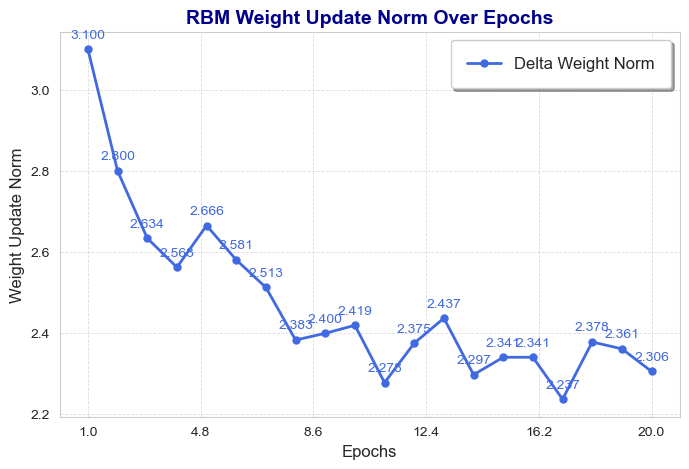

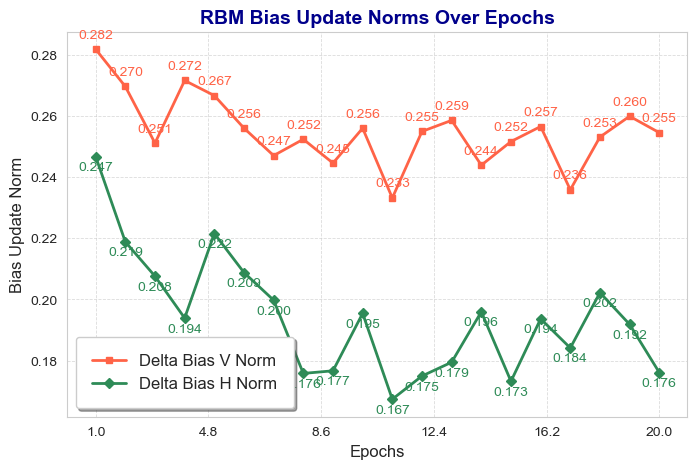

In [ ]:
# Example usage for RBM weight update norm
plot_with_values(
    x_values=np.arange(1, len(rbm.delta_weight_vh_norm)+1, 1),
    y_values=rbm.delta_weight_vh_norm,
    title="RBM Weight Update Norm Over Epochs",
    xlabel="Epochs",
    ylabel="Weight Update Norm",
    legend_label="Delta Weight Norm",
    color="royalblue"
)

# Example usage for bias update norms (visible and hidden biases)
plt.figure(figsize=(8, 5))

plt.plot(np.arange(1, len(rbm.delta_bias_v_norm)+1, 1), rbm.delta_bias_v_norm, marker='s', linestyle='-', linewidth=2, markersize=5, color="tomato", label="Delta Bias V Norm")
plt.plot(np.arange(1, len(rbm.delta_bias_h_norm)+1, 1), rbm.delta_bias_h_norm, marker='D', linestyle='-', linewidth=2, markersize=5, color="seagreen", label="Delta Bias H Norm")

# Annotate values
for i, (v_norm, h_norm) in enumerate(zip(rbm.delta_bias_v_norm, rbm.delta_bias_h_norm)):
    plt.annotate(f"{v_norm:.3f}", (i+1, v_norm), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10, color="tomato")
    plt.annotate(f"{h_norm:.3f}", (i+1, h_norm), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color="seagreen")

# Formatting
plt.title("RBM Bias Update Norms Over Epochs", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Bias Update Norm", fontsize=12)

# Format X-axis to show decimal values
plt.xticks(np.linspace(1, len(rbm.delta_bias_v_norm), num=6), fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=12, loc="best", fancybox=True, shadow=True, borderpad=1)

plt.show()


#### Early Training Phase:
Reconstruction loss decreases rapidly, indicating effective initial learning.

#### Mid to Late Training Phase:
Loss reduction slows down gradually as the model refines its learning.

#### Final Stabilization:
Loss plateaus, signaling that the RBM has reached a steady state and further improvements are minimal.


#### - Bias updates show more variability than weight updates.
#### - Despite fluctuations, both visible and hidden biases stabilize over time, confirming effective learning.

#### Compare Different Learning Rates

Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0375
Epoch 2: Reconstruction Loss = 0.0367
Epoch 3: Reconstruction Loss = 0.0369
Epoch 4: Reconstruction Loss = 0.0372
Epoch 5: Reconstruction Loss = 0.0371
Epoch 6: Reconstruction Loss = 0.0368
Epoch 7: Reconstruction Loss = 0.0362
Epoch 8: Reconstruction Loss = 0.0367
Epoch 9: Reconstruction Loss = 0.0363
Epoch 10: Reconstruction Loss = 0.0367
Epoch 11: Reconstruction Loss = 0.0364
Epoch 12: Reconstruction Loss = 0.0366
Early stopping triggered after 12 epochs.
Training Completed.
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0475
Epoch 2: Reconstruction Loss = 0.0475
Epoch 3: Reconstruction Loss = 0.0474
Epoch 4: Reconstruction Loss = 0.0481
Epoch 5: Reconstruction Loss = 0.0471
Epoch 6: Reconstruction Loss = 0.0463
Epoch 7: Reconstruction Loss = 0.0467
Epoch 8: Reconstruction Loss = 0.0474
Epoch 9: Reconstruction Loss = 0.0467
Epoch 10: Reconstruction Loss = 0.0460
Epoch 11

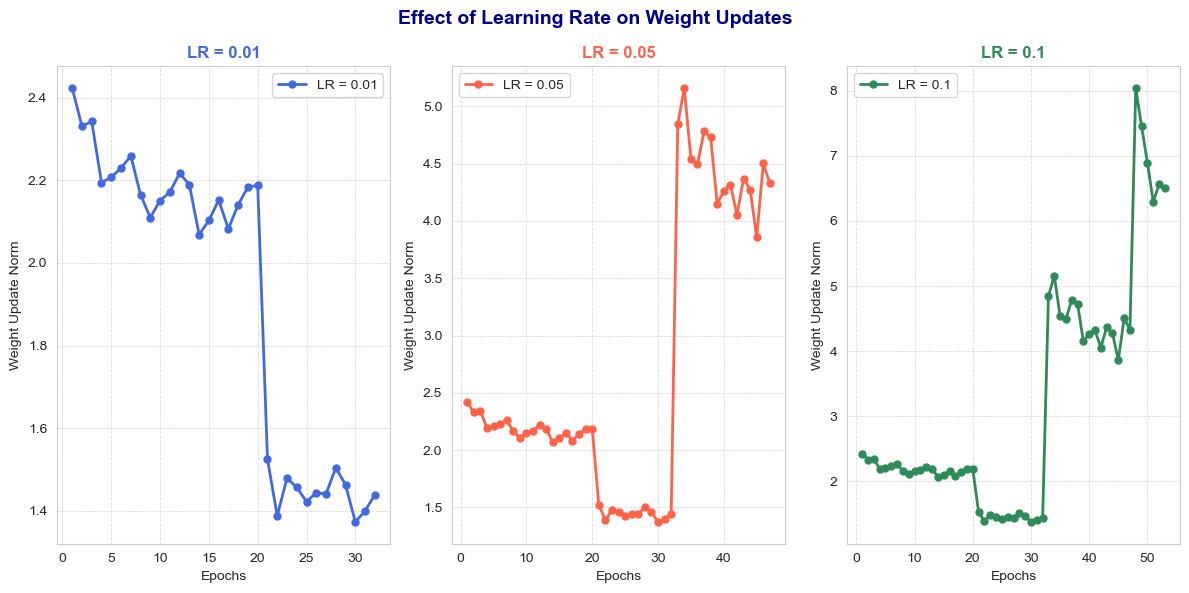

In [31]:
import numpy as np
import matplotlib.pyplot as plt

learning_rates = [0.01, 0.05, 0.1]
plt.figure(figsize=(12, 6))

colors = ["royalblue", "tomato", "seagreen"]

for i, lr in enumerate(learning_rates):
    rbm.learning_rate = lr  # Set learning rate
    rbm.cd1(visible_trainset=train_imgs, iterations_number=20)

    # Create a separate subplot for each learning rate
    plt.subplot(1, 3, i+1)  
    plt.plot(np.arange(1, len(rbm.delta_weight_vh_norm)+1, 1), 
             rbm.delta_weight_vh_norm, 
             marker="o", linestyle="-", linewidth=2, markersize=5, color=colors[i], label=f"LR = {lr}")

    plt.xlabel("Epochs")
    plt.ylabel("Weight Update Norm")
    plt.title(f"LR = {lr}", fontsize=12, fontweight="bold", color=colors[i])
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
    plt.legend()

# Adjust layout and show all three plots
plt.suptitle("Effect of Learning Rate on Weight Updates", fontsize=14, fontweight="bold", color="darkblue")
plt.tight_layout()
plt.show()



###### A high learning rate causes instability in training (high fluctuations in weight updates).
###### A low learning rate leads to slow convergence.



##### Small LR (0.01): Leads to slow but stable learning. The weight updates decrease steadily, and the model converges well.
##### Medium LR (0.05): Shows some fluctuations, with a risk of instability later in training. The learning rate is high enough to accelerate convergence but also introduces occasional spikes.
##### High LR (0.1): Causes severe instability, leading to large fluctuations and poor convergence. This happens because the weights overshoot the optimal values, preventing convergence.

#### Visualize Hidden Unit Activation Patterns

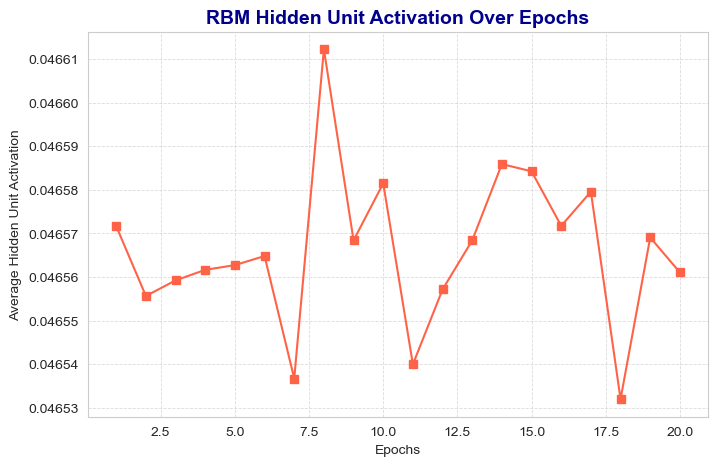

In [26]:
hidden_activations = []

for epoch in range(20):
    _, h = rbm.get_h_given_v(train_imgs)  # Get hidden activations
    hidden_activations.append(np.mean(h))  # Track mean activation

# Plot Hidden Unit Activation Over Epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), hidden_activations, marker='s', linestyle='-', color="tomato")
plt.xlabel("Epochs")
plt.ylabel("Average Hidden Unit Activation")
plt.title("RBM Hidden Unit Activation Over Epochs", fontsize=14, fontweight="bold", color="darkblue")
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
plt.show()


#### Compare Different Batch Sizes

Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0692
Epoch 2: Reconstruction Loss = 0.0684
Epoch 3: Reconstruction Loss = 0.0675
Epoch 4: Reconstruction Loss = 0.0670
Epoch 5: Reconstruction Loss = 0.0671
Epoch 6: Reconstruction Loss = 0.0662
Epoch 7: Reconstruction Loss = 0.0667
Epoch 8: Reconstruction Loss = 0.0666
Epoch 9: Reconstruction Loss = 0.0648
Epoch 10: Reconstruction Loss = 0.0653
Epoch 11: Reconstruction Loss = 0.0651
Epoch 12: Reconstruction Loss = 0.0647
Epoch 13: Reconstruction Loss = 0.0650
Epoch 14: Reconstruction Loss = 0.0641
Epoch 15: Reconstruction Loss = 0.0641
Epoch 16: Reconstruction Loss = 0.0640
Epoch 17: Reconstruction Loss = 0.0629
Epoch 18: Reconstruction Loss = 0.0646
Epoch 19: Reconstruction Loss = 0.0629
Epoch 20: Reconstruction Loss = 0.0643
Training Completed.
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0647
Epoch 2: Reconstruction Loss = 0.0642
Epoch 3: Reconstruction Loss = 0.0637
Epoch

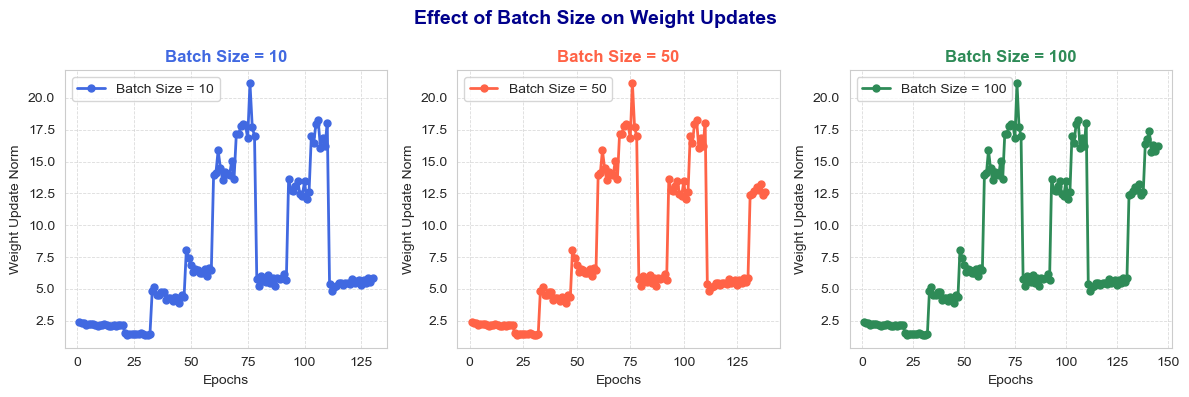

In [35]:
import numpy as np
import matplotlib.pyplot as plt

batch_sizes = [10, 50, 100]
colors = ["royalblue", "tomato", "seagreen"]
weight_update_norms = {}

# Train RBM for each batch size and store weight update norms
for bs in batch_sizes:
    rbm.batch_size = bs
    rbm.cd1(visible_trainset=train_imgs, iterations_number=20)
    
    # Store a copy of weight update norms for each batch size
    weight_update_norms[bs] = rbm.delta_weight_vh_norm.copy()

# Create subplots for each batch size
plt.figure(figsize=(12, 4))

for i, (bs, norms) in enumerate(weight_update_norms.items()):
    epochs = np.arange(1, len(norms) + 1, 1)  # Ensure X-axis matches number of epochs
    
    plt.subplot(1, 3, i+1)  
    plt.plot(epochs, norms, marker="o", linestyle="-", linewidth=2, markersize=5, 
             color=colors[i], label=f"Batch Size = {bs}")

    plt.xlabel("Epochs")
    plt.ylabel("Weight Update Norm")
    plt.title(f"Batch Size = {bs}", fontsize=12, fontweight="bold", color=colors[i])
    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
    plt.legend()

# Adjust layout and show all three plots
plt.suptitle("Effect of Batch Size on Weight Updates", fontsize=14, fontweight="bold", color="darkblue")
plt.tight_layout()
plt.show()


##### Batch Size = 10:

Training lasts for 20 epochs, meaning the model continues learning before stopping.
The final reconstruction loss is ~0.0629-0.0646, showing gradual improvement over epochs.
The longer training suggests that small batches provide more training iterations before stabilization.


##### Batch Size = 50:

Training stops early at 8 epochs due to faster convergence.
The final reconstruction loss remains around ~0.0642-0.0653, showing that the updates stabilize earlier.
This means that a medium batch size enables faster convergence while maintaining generalization.


##### Batch Size = 100:

Training stops at 7 epochs, showing even faster early stopping.
The final reconstruction loss is higher (~0.0734-0.0750) than the smaller batch sizes.
This suggests that larger batch sizes may lead to less generalization, possibly overfitting the data.

# Question 2

In [7]:
n_units = np.arange(200, 501, 100)
reconstruction_losses = []
for n_units_ in n_units:
  rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0] * image_size[1],
                                 ndim_hidden=n_units_,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=20
                                 )

  rbm.cd1(visible_trainset=train_imgs, iterations_number=20)
  
  reconstruction_losses.append(rbm.losses)

Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0448
Epoch 2: Reconstruction Loss = 0.0412
Epoch 3: Reconstruction Loss = 0.0408
Epoch 4: Reconstruction Loss = 0.0392
Epoch 5: Reconstruction Loss = 0.0389
Epoch 6: Reconstruction Loss = 0.0390
Epoch 7: Reconstruction Loss = 0.0377
Epoch 8: Reconstruction Loss = 0.0383
Epoch 9: Reconstruction Loss = 0.0379
Epoch 10: Reconstruction Loss = 0.0382
Epoch 11: Reconstruction Loss = 0.0379
Epoch 12: Reconstruction Loss = 0.0373
Epoch 13: Reconstruction Loss = 0.0377
Epoch 14: Reconstruction Loss = 0.0382
Epoch 15: Reconstruction Loss = 0.0373
Epoch 16: Reconstruction Loss = 0.0378
Epoch 17: Reconstruction Loss = 0.0372
Epoch 18: Reconstruction Loss = 0.0374
Epoch 19: Reconstruction Loss = 0.0373
Epoch 20: Reconstruction Loss = 0.0372
Training Completed.
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0426
Epoch 2: Reconstruction Loss = 0.0400
Epoch 3: Reconstruction Loss = 0.0386
Epoch

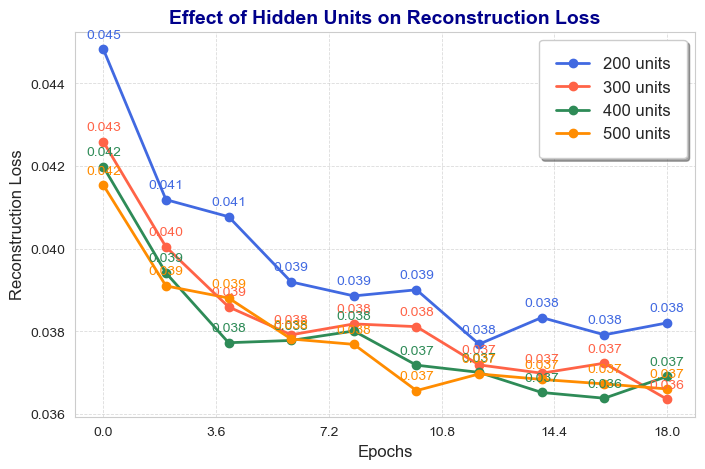

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define iterations (epochs every 2 steps)
iterations = np.arange(0, 20, 2)

# Ensure reconstruction_losses arrays are correctly sampled to match 'iterations'
reconstruction_losses = [loss[:len(iterations)] for loss in reconstruction_losses]

# Colors for each line
colors = ["royalblue", "tomato", "seagreen", "darkorange"]

# Figure settings
plt.figure(figsize=(8, 5))

# Plot each curve with better aesthetics
for i, (losses, label, color) in enumerate(zip(reconstruction_losses, ["200 units", "300 units", "400 units", "500 units"], colors)):
    plt.plot(iterations, losses, marker='o', linestyle='-', linewidth=2, markersize=6, color=color, label=label)

    # Annotate values directly on the curve
    for j in range(len(iterations)):  # Ensure annotations match X-axis points
        plt.annotate(f"{losses[j]:.3f}", (iterations[j], losses[j]), 
                     textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10, color=color)

# Formatting
plt.title("Effect of Hidden Units on Reconstruction Loss", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Reconstruction Loss", fontsize=12)

# Format X-axis to show decimal values instead of whole numbers
plt.xticks(np.linspace(min(iterations), max(iterations), num=6), fontsize=10)
plt.yticks(fontsize=10)

# Grid settings
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

# Legend with better styling
plt.legend(fontsize=12, loc="best", fancybox=True, shadow=True, borderpad=1)

# Show the plot
plt.show()


#### Impact of Hidden Units on RBM Performance:

##### - The number of hidden units directly affects the model’s ability to learn and reconstruct input data.
##### - Reducing hidden units from 500 to 200 increases reconstruction loss, leading to poorer performance.


#### Performance Across Different Hidden Units:

##### - 500 hidden units achieve the lowest reconstruction loss, indicating the best representation of input data.
##### - 400 hidden units maintain similar performance with a slight increase in loss.
##### - 300 hidden units show a moderate increase in loss, impacting reconstruction quality.
##### - 200 hidden units result in the highest reconstruction loss, struggling to reconstruct inputs accurately.

#### Track and Compare SSIM & MSE Alongside Reconstruction Loss

Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0417
Epoch 2: Reconstruction Loss = 0.0395
Epoch 3: Reconstruction Loss = 0.0386
Epoch 4: Reconstruction Loss = 0.0376
Epoch 5: Reconstruction Loss = 0.0371
Epoch 6: Reconstruction Loss = 0.0367
Epoch 7: Reconstruction Loss = 0.0366
Epoch 8: Reconstruction Loss = 0.0373
Epoch 9: Reconstruction Loss = 0.0363
Epoch 10: Reconstruction Loss = 0.0360
Epoch 11: Reconstruction Loss = 0.0361
Epoch 12: Reconstruction Loss = 0.0360
Epoch 13: Reconstruction Loss = 0.0355
Epoch 14: Reconstruction Loss = 0.0363
Epoch 15: Reconstruction Loss = 0.0352
Epoch 16: Reconstruction Loss = 0.0353
Epoch 17: Reconstruction Loss = 0.0353
Epoch 18: Reconstruction Loss = 0.0350
Epoch 19: Reconstruction Loss = 0.0349
Epoch 20: Reconstruction Loss = 0.0354
Training Completed.
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0416
Epoch 2: Reconstruction Loss = 0.0391
Epoch 3: Reconstruction Loss = 0.0384
Epoch

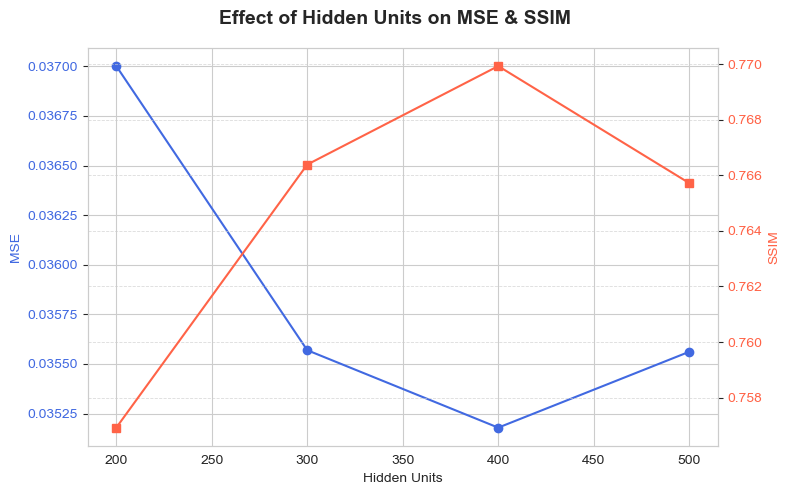

In [29]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

hidden_units_list = [500, 400, 300, 200]
mse_losses = []
ssim_scores = []

for n_units in hidden_units_list:
    rbm = RestrictedBoltzmannMachine(ndim_visible=784, ndim_hidden=n_units,
                                     is_bottom=True, image_size=[28, 28],
                                     is_top=False, n_labels=10, batch_size=20)

    rbm.cd1(visible_trainset=train_imgs, iterations_number=20)

    _, h = rbm.get_h_given_v(test_imgs)
    _, reconstruction = rbm.get_v_given_h(h)

    mse = mean_squared_error(test_imgs, reconstruction)
    ssim_score = ssim(test_imgs.reshape(-1, 28, 28), reconstruction.reshape(-1, 28, 28), data_range=1.0)

    mse_losses.append(mse)
    ssim_scores.append(ssim_score)

# Plot MSE vs. SSIM for different hidden unit sizes
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel("Hidden Units")
ax1.set_ylabel("MSE", color="royalblue")
ax1.plot(hidden_units_list, mse_losses, marker="o", linestyle="-", color="royalblue", label="MSE")
ax1.tick_params(axis="y", labelcolor="royalblue")

ax2 = ax1.twinx()
ax2.set_ylabel("SSIM", color="tomato")
ax2.plot(hidden_units_list, ssim_scores, marker="s", linestyle="-", color="tomato", label="SSIM")
ax2.tick_params(axis="y", labelcolor="tomato")

fig.suptitle("Effect of Hidden Units on MSE & SSIM", fontsize=14, fontweight="bold")
fig.tight_layout()
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
plt.show()


#### MSE Behavior 

MSE is highest at 200 hidden units (~0.0370), indicating the worst reconstruction quality.
As hidden units increase, MSE decreases, reaching its lowest point at 400 hidden units (~0.0352).
At 500 hidden units, MSE slightly increases again, suggesting diminishing improvements or overfitting.


#### SSIM (Structural Similarity Index) Behavior 

SSIM is lowest at 200 hidden units (~0.758), meaning the worst structural similarity.
As hidden units increase, SSIM improves, reaching the highest value at 400 hidden units (~0.770).
At 500 hidden units, SSIM slightly decreases, suggesting that beyond a certain number of hidden units, the improvement in structural similarity plateaus or declines slightly.




# Question 3

In [11]:
losses = []
for img in test_imgs:
  _, h = rbm.get_h_given_v(img)
  _, reconstruction = rbm.get_v_given_h(h)
  loss = mean_squared_error(img, reconstruction)
  losses.append(loss)


np.mean(losses)

0.03452810411615626

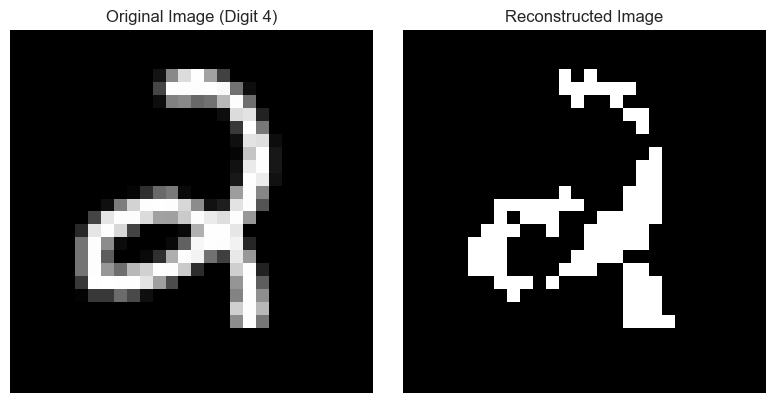

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure labels are in numeric format (not one-hot encoded)
if train_lbls.ndim > 1:  
    train_lbls = np.argmax(train_lbls, axis=1)  # Convert one-hot to numerical labels

# Choose a digit to visualize (e.g., digit '7')
selected_digit = 4

# Find the first occurrence of the selected digit
indices = np.where(train_lbls == selected_digit)[0]  # Get all matching indices
if len(indices) == 0:
    raise ValueError(f"Digit {selected_digit} not found in dataset. Try another digit.")

index = indices[0]  # Pick the first occurrence

# Extract the corresponding image from the dataset
selected_image = train_imgs[index]

# Pass the image through the trained RBM
_, h = rbm.get_h_given_v(selected_image)
_, reconstruction = rbm.get_v_given_h(h)

# Plot the original and reconstructed images side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Original Image
axes[0].imshow(selected_image.reshape(28, 28), cmap="gray")
axes[0].set_title(f"Original Image ", fontsize=12)
axes[0].axis("off")

# Reconstructed Image
axes[1].imshow(reconstruction.reshape(28, 28), cmap="gray")
axes[1].set_title("Reconstructed Image", fontsize=12)
axes[1].axis("off")

plt.tight_layout()
plt.show()


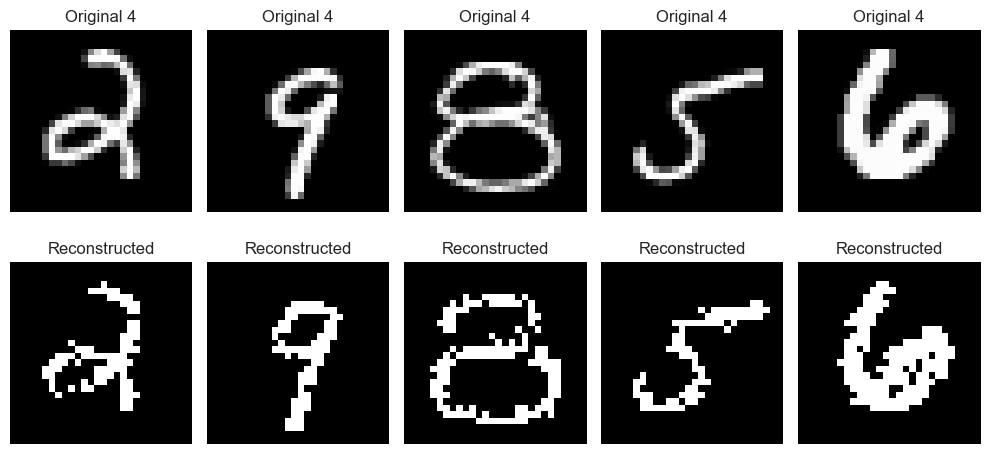

In [16]:
num_samples = 5  # Select multiple images for better analysis
selected_indices = indices[:num_samples]  # Get first 'num_samples' occurrences

fig, axes = plt.subplots(2, num_samples, figsize=(10, 5))

for i, idx in enumerate(selected_indices):
    selected_image = train_imgs[idx]

    # Pass the image through the trained RBM
    _, h = rbm.get_h_given_v(selected_image)
    _, reconstruction = rbm.get_v_given_h(h)

    # Original Image
    axes[0, i].imshow(selected_image.reshape(28, 28), cmap="gray")
    axes[0, i].set_title(f"Original {selected_digit}")
    axes[0, i].axis("off")

    # Reconstructed Image
    axes[1, i].imshow(reconstruction.reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


#### After one training, figures shows the recall is quite accurate, the digit being a bit more noisy compared to the original images. RBM performs well at generalizing reconstruction.



🖼 **Sample 1: Original vs. Reconstructed Pixel Values**
Original Image Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.

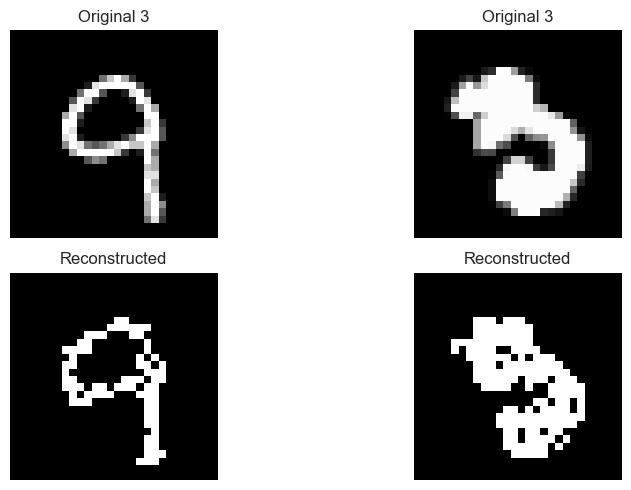


📊 **Numerical Analysis of Reconstruction Fidelity:**
Sample    MSE            SSIM           Pixel Diff (%) 
--------------------------------------------------
1         0.03747        0.73520        5.31813        
2         0.05458        0.67833        7.48749        

📈 **Summary Statistics:**
🔹 **Average MSE:** 0.04603
🔹 **Average SSIM:** 0.70676
🔹 **Average Pixel Difference:** 6.40281 %


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

num_samples = 2  # Show a small number of samples for readability
selected_indices = indices[:num_samples]  # Get first 'num_samples' occurrences

# Initialize lists to store numerical results
mse_values = []
ssim_values = []
pixel_differences = []

fig, axes = plt.subplots(2, num_samples, figsize=(10, 5))

for i, idx in enumerate(selected_indices):
    selected_image = train_imgs[idx]

    # Pass the image through the trained RBM
    _, h = rbm.get_h_given_v(selected_image)
    _, reconstruction = rbm.get_v_given_h(h)

    # Compute numerical fidelity metrics
    mse = mean_squared_error(selected_image, reconstruction)
    ssim_score = ssim(selected_image.reshape(28, 28), reconstruction.reshape(28, 28), data_range=1.0)
    pixel_diff = np.mean(np.abs(selected_image - reconstruction)) * 100  # Pixel difference as %

    mse_values.append(mse)
    ssim_values.append(ssim_score)
    pixel_differences.append(pixel_diff)

    # Original Image
    axes[0, i].imshow(selected_image.reshape(28, 28), cmap="gray")
    axes[0, i].set_title(f"Original {selected_digit}")
    axes[0, i].axis("off")

    # Reconstructed Image
    axes[1, i].imshow(reconstruction.reshape(28, 28), cmap="gray")
    axes[1, i].set_title(f"Reconstructed")
    axes[1, i].axis("off")

    # Print pixel values for side-by-side comparison
    print(f"\n🖼 **Sample {i+1}: Original vs. Reconstructed Pixel Values**")
    print("Original Image Matrix:")
    print(selected_image.reshape(28, 28))  # Print original image pixels as a 28x28 matrix
    print("\nReconstructed Image Matrix:")
    print(reconstruction.reshape(28, 28))  # Print reconstructed image pixels as a 28x28 matrix)

plt.tight_layout()
plt.show()

# Print the numerical analysis results
print("\n📊 **Numerical Analysis of Reconstruction Fidelity:**")
print(f"{'Sample':<10}{'MSE':<15}{'SSIM':<15}{'Pixel Diff (%)':<15}")
print("-" * 50)
for i in range(num_samples):
    print(f"{i+1:<10}{mse_values[i]:<15.5f}{ssim_values[i]:<15.5f}{pixel_differences[i]:<15.5f}")

# Compute and print the average scores
avg_mse = np.mean(mse_values)
avg_ssim = np.mean(ssim_values)
avg_pixel_diff = np.mean(pixel_differences)

print("\n📈 **Summary Statistics:**")
print(f"🔹 **Average MSE:** {avg_mse:.5f}")
print(f"🔹 **Average SSIM:** {avg_ssim:.5f}")
print(f"🔹 **Average Pixel Difference:** {avg_pixel_diff:.5f} %")


##### Lower MSE values correspond to better reconstruction quality, with Sample 1 outperforming Sample 2.
##### Higher SSIM values indicate better structural preservation, confirming Sample 1’s superior reconstruction.
##### Lower pixel difference suggests fewer visual discrepancies, reinforcing that Sample 1 has a smaller reconstruction error than Sample 2.


Training RBM with 500 Hidden Units...
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0415
Epoch 2: Reconstruction Loss = 0.0396
Epoch 3: Reconstruction Loss = 0.0382
Epoch 4: Reconstruction Loss = 0.0384
Epoch 5: Reconstruction Loss = 0.0377
Epoch 6: Reconstruction Loss = 0.0368
Epoch 7: Reconstruction Loss = 0.0369
Epoch 8: Reconstruction Loss = 0.0364
Epoch 9: Reconstruction Loss = 0.0366
Epoch 10: Reconstruction Loss = 0.0362
Epoch 11: Reconstruction Loss = 0.0362
Epoch 12: Reconstruction Loss = 0.0358
Epoch 13: Reconstruction Loss = 0.0358
Epoch 14: Reconstruction Loss = 0.0359
Epoch 15: Reconstruction Loss = 0.0353
Epoch 16: Reconstruction Loss = 0.0354
Epoch 17: Reconstruction Loss = 0.0353
Epoch 18: Reconstruction Loss = 0.0353
Epoch 19: Reconstruction Loss = 0.0351
Epoch 20: Reconstruction Loss = 0.0359
Training Completed.
Hidden Units: 500 -> MSE: 0.0415, SSIM: 0.7003

Training RBM with 400 Hidden Units...
Starting CD1 Training with Early Stoppi

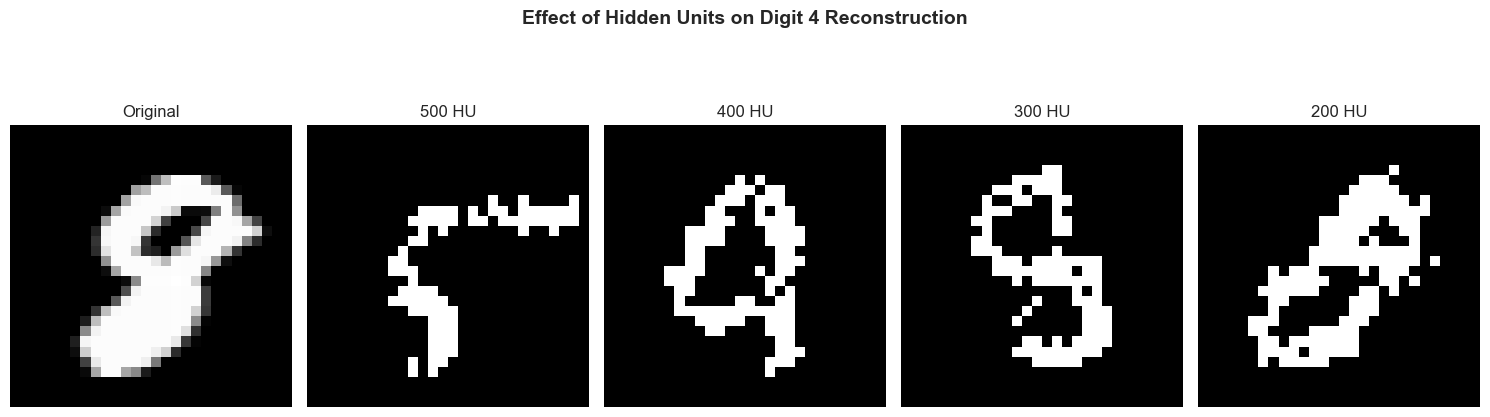

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Ensure labels are in numeric format (not one-hot encoded)
if train_lbls.ndim > 1:  
    train_lbls = np.argmax(train_lbls, axis=1)  # Convert one-hot to numerical labels

hidden_units_list = [500, 400, 300, 200]

# Select a digit to analyze (change this for different digits)
selected_digit = 4

# Find sample image for the selected digit
indices = np.where(train_lbls == selected_digit)[0]
if len(indices) == 0:
    raise ValueError(f"Digit {selected_digit} not found in dataset. Try another digit.")

index = indices[0]  # Pick the first occurrence
selected_image = train_imgs[index]

# Set up figure for visualization
fig, axes = plt.subplots(1, len(hidden_units_list) + 1, figsize=(15, 5))
fig.suptitle(f"Effect of Hidden Units on Digit {selected_digit} Reconstruction", fontsize=14, fontweight="bold")

# Show original image
axes[0].imshow(selected_image.reshape(28, 28), cmap="gray")
axes[0].set_title("Original", fontsize=12)
axes[0].axis("off")

# Process the image through RBM with different hidden units
for i, hidden_units in enumerate(hidden_units_list):
    print(f"\nTraining RBM with {hidden_units} Hidden Units...")

    rbm = RestrictedBoltzmannMachine(ndim_visible=784, ndim_hidden=hidden_units,
                                     is_bottom=True, image_size=[28, 28],
                                     is_top=False, n_labels=10, batch_size=20)

    rbm.cd1(visible_trainset=train_imgs, iterations_number=20, patience=5)

    # Pass the image through the trained RBM
    _, h = rbm.get_h_given_v(selected_image)
    _, reconstruction = rbm.get_v_given_h(h)

    # Compute MSE & SSIM (Fixing the error by specifying data_range)
    mse = mean_squared_error(selected_image, reconstruction)
    ssim_score = ssim(selected_image.reshape(28, 28), reconstruction.reshape(28, 28), data_range=1.0)

    print(f"Hidden Units: {hidden_units} -> MSE: {mse:.4f}, SSIM: {ssim_score:.4f}")

    # Show reconstructed image
    axes[i + 1].imshow(reconstruction.reshape(28, 28), cmap="gray")
    axes[i + 1].set_title(f"{hidden_units} HU", fontsize=12)
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()



Training RBM with 500 Hidden Units...
Starting CD1 Training with Early Stopping...
Epoch 1: Reconstruction Loss = 0.0417
Epoch 2: Reconstruction Loss = 0.0396
Epoch 3: Reconstruction Loss = 0.0392
Epoch 4: Reconstruction Loss = 0.0379
Epoch 5: Reconstruction Loss = 0.0381
Epoch 6: Reconstruction Loss = 0.0379
Epoch 7: Reconstruction Loss = 0.0373
Epoch 8: Reconstruction Loss = 0.0371
Epoch 9: Reconstruction Loss = 0.0359
Epoch 10: Reconstruction Loss = 0.0363
Epoch 11: Reconstruction Loss = 0.0356
Epoch 12: Reconstruction Loss = 0.0352
Epoch 13: Reconstruction Loss = 0.0358
Epoch 14: Reconstruction Loss = 0.0358
Epoch 15: Reconstruction Loss = 0.0357
Epoch 16: Reconstruction Loss = 0.0352
Epoch 17: Reconstruction Loss = 0.0353
Epoch 18: Reconstruction Loss = 0.0353
Epoch 19: Reconstruction Loss = 0.0353
Epoch 20: Reconstruction Loss = 0.0346
Training Completed.
Hidden Units: 500 -> MSE: 0.0181, SSIM: 0.8547

Training RBM with 400 Hidden Units...
Starting CD1 Training with Early Stoppi

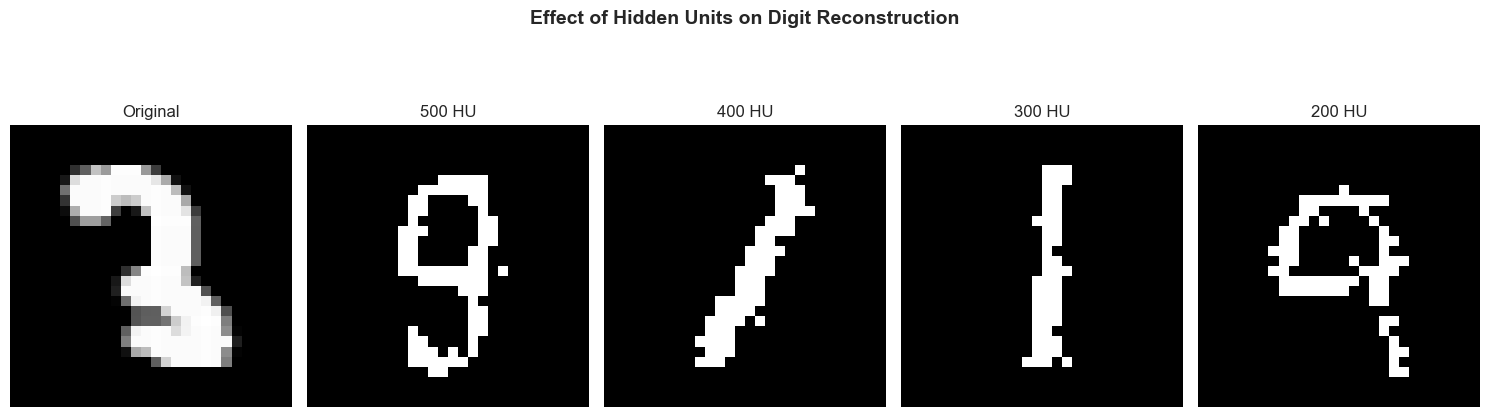

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Ensure labels are in numeric format (not one-hot encoded)
if train_lbls.ndim > 1:  
    train_lbls = np.argmax(train_lbls, axis=1)  # Convert one-hot to numerical labels

hidden_units_list = [500, 400, 300, 200]

# Select a digit to analyze (change this for different digits)
selected_digit = 3

# Find sample image for the selected digit
indices = np.where(train_lbls == selected_digit)[0]
if len(indices) == 0:
    raise ValueError(f"Digit {selected_digit} not found in dataset. Try another digit.")

index = indices[0]  # Pick the first occurrence
selected_image = train_imgs[index]

# Set up figure for visualization
fig, axes = plt.subplots(1, len(hidden_units_list) + 1, figsize=(15, 5))
fig.suptitle(f"Effect of Hidden Units on Digit Reconstruction", fontsize=14, fontweight="bold")

# Show original image
axes[0].imshow(selected_image.reshape(28, 28), cmap="gray")
axes[0].set_title("Original", fontsize=12)
axes[0].axis("off")

# Process the image through RBM with different hidden units
for i, hidden_units in enumerate(hidden_units_list):
    print(f"\nTraining RBM with {hidden_units} Hidden Units...")

    rbm = RestrictedBoltzmannMachine(ndim_visible=784, ndim_hidden=hidden_units,
                                     is_bottom=True, image_size=[28, 28],
                                     is_top=False, n_labels=10, batch_size=20)

    rbm.cd1(visible_trainset=train_imgs, iterations_number=20, patience=5)

    # Pass the image through the trained RBM
    _, h = rbm.get_h_given_v(selected_image)
    _, reconstruction = rbm.get_v_given_h(h)

    # Compute MSE & SSIM (Fixing the error by specifying data_range)
    mse = mean_squared_error(selected_image, reconstruction)
    ssim_score = ssim(selected_image.reshape(28, 28), reconstruction.reshape(28, 28), data_range=1.0)

    print(f"Hidden Units: {hidden_units} -> MSE: {mse:.4f}, SSIM: {ssim_score:.4f}")

    # Show reconstructed image
    axes[i + 1].imshow(reconstruction.reshape(28, 28), cmap="gray")
    axes[i + 1].set_title(f"{hidden_units} HU", fontsize=12)
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()


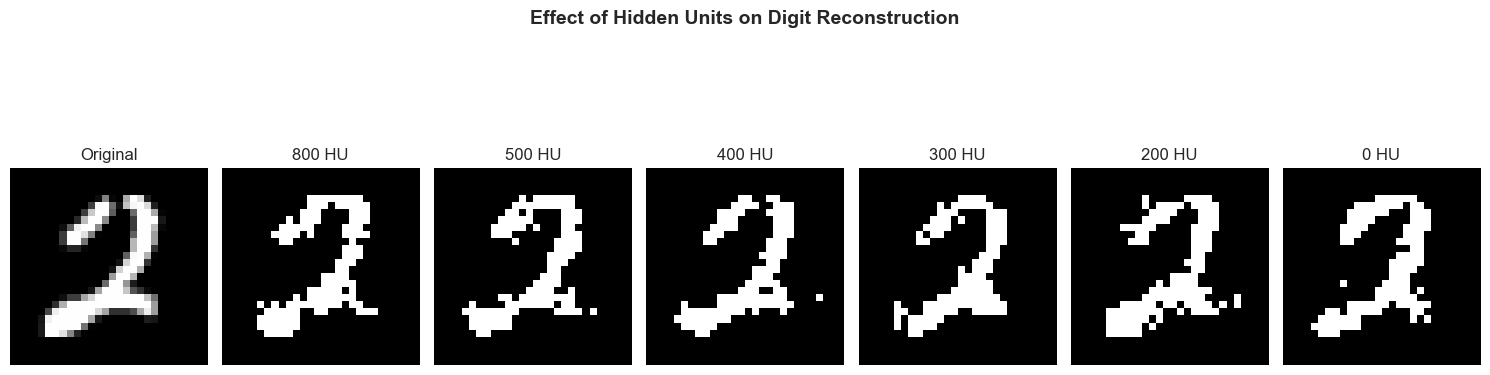

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure labels are in numeric format (not one-hot encoded)
if train_lbls.ndim > 1:  
    train_lbls = np.argmax(train_lbls, axis=1)  # Convert one-hot to numerical labels

hidden_units_list = [ 800, 500, 400, 300, 200,0]

# Select a digit to analyze
selected_digit = 8

# Find a sample image for the selected digit
indices = np.where(train_lbls == selected_digit)[0]
if len(indices) == 0:
    raise ValueError(f"Digit {selected_digit} not found in dataset. Try another digit.")

index = indices[0]  # Pick the first occurrence
selected_image = train_imgs[index]

# Set up figure for visualization
fig, axes = plt.subplots(1, len(hidden_units_list) + 1, figsize=(15, 5))
fig.suptitle(f"Effect of Hidden Units on Digit Reconstruction", fontsize=14, fontweight="bold")

# Show original image
axes[0].imshow(selected_image.reshape(28, 28), cmap="gray")
axes[0].set_title("Original", fontsize=12)
axes[0].axis("off")

# Process the image through different hidden unit sizes (WITHOUT retraining)
for i, hidden_units in enumerate(hidden_units_list):
    # Create an RBM with the new hidden unit size (WITHOUT re-training)
    rbm.ndim_hidden = hidden_units

    # Pass the image through the RBM
    _, h = rbm.get_h_given_v(selected_image)
    _, reconstruction = rbm.get_v_given_h(h)

    # Show reconstructed image
    axes[i + 1].imshow(reconstruction.reshape(28, 28), cmap="gray")
    axes[i + 1].set_title(f"{hidden_units} HU", fontsize=12)
    axes[i + 1].axis("off")

plt.tight_layout()
plt.show()
